# __"데이터 분석을 바탕으로 한 등산로 이용자 Demographic Segmentation"__  
### __[산림 플랫폼]__  

<br/>

최근 개인의 건강과 환경문제 관심 증대에 따라 LOHAS(Lifestyles of Health And Sustainability) 기반형 여가 문화가 확산 추세에 있다. 그 가장 일반적인 형태로서 자연환경 내 보행 중심의 등산로 이용에 대한 수요가 증가하고 있다. 이에 따라 등산 인구의 증가 및 다양화 흐름이 가속화 되고 있으며, 늘어나는 등산 수요에 맞게 이용자를 세분화하고 이와 관련한 등산 기반 시설 프로그램에 대한 기준을 마련할 필요성이 제기되고 있다.  
본 분석은 위와 같은 배경에 따라 등산로 이용자의 인구통계학적 세분화를 시행하고, 해당 결과를 분석함으로써 등산 기반 프로그램의 다양화에 참고가 될 수 있는 자료를 제공하고 방향성 설정에 기여하고자 한다.

#### __작성자: 김지현__  

<br/>

본 분석에서는 2019년 등산로 이용객을 대상으로 관심사를 설문한 데이터를 사용하였다. 원 데이터셋에는 이용자의 성별, 연령, 가구소득, 결혼여부, 자녀여부, 주거형태, 거주지역(시도, 군구, 동), 사용하는 자동차 그룹, 휴대전화 제조사, 휴대전화 가입회사, 정치/경제/사회/생활/세계/IT/스포츠 중 어디에 관심이 있는지, 정보획득사이트 등에 대한 정보가 담겨 있으며, 이때 인구통계학적 분석을 위하여 관련한 칼럼들만을 추출하여 기술적으로 분석하였다. 이로써 등산 기반 프로그램을 새롭게 시행하고자 할 때 이용자들의 특성을 분석하는 데 참고가 되는 근거자료를 제공하는 데 도움이 될 수 있을 것으로 기대된다.

#### __활용 데이터셋__  
활용한 데이터셋은 다음과 같다.  


Table | 원천 데이터셋 링크 | 비고 
------|----------------|-------
등산로 이용자 관심사 | https://www.bigdata-forest.kr/product/FPL020801 | 산림 빅데이터 플랫폼 제공


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## __[Preprocessing]__

### __Importing Raw Data__

In [2]:
# 등산로 이용자 관심사 데이터 로딩
hk_user = pd.read_csv("FPL020801.csv", encoding='cp949')
hk_user.head(15)

,auser_ntrs_id,info_obtn_dt,auser_sxdst_cd,age_group_cd,auser_occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm,rsid_fom_nm,auser_ara_ctprv_nm,...,ecnm_dgnt_cont,sct_dgnt_cont,lilhd_dgnt_cont,wrld_dgnt_cont,it_dgnt_cont,sprt_dgnt_cont,tv_etmn_dgnt_cont,main_ntrs_cd,info_obtn_site_url,info_obtn_site_subjc_nm
0,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=416&aid...,배우 윤주빈 알고보니 윤봉길 의사 종손…3.1절 기념식 편지낭독 :: 네이버 TV연예
1,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=241&aid...,[단독]정인선 조보아 이어 골목식당 새 MC :: 네이버 TV연예
2,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=108&aid...,윤주빈 3.1절 편지 낭독→윤봉길 종손 화제→꽃길 응원 봇물[스타이슈] :: 네이버...
3,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=213&aid...,‘해투4’ 박유나 “김보라 ‘왜 또 나가냐’고”→전현무 “지금 정신없을 때” :: ...
4,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=144&aid...,박유천 전 연인 황하나 의미심장 글…“남자 하나 잘못 만나 별일 다 겪네” :: 네...
5,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,https://m.news.naver.com/read.nhn?sid1=100&oid...,협상 결렬 뒤 두문불출 김정은 베트남 방문일정 소화 가능할까
6,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,세계,NaN,NaN,NaN,TV연예,https://m.news.naver.com/read.nhn?mode=LSD&mid...,[김현석의 월스트리트나우] 미북 회담 결렬에서 미중 협상의 미래를 본 월가
7,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,사회,NaN,NaN,NaN,NaN,NaN,TV연예,https://m.news.naver.com/read.nhn?mode=LSD&sid...,유은혜 사립유치원 70% 조사 결과 전국 164곳만 개학 연기
8,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=109&aid...,씨야 출신 김연지 1년 만에 컴백...8일 10년이나 버티니 공개 [공식입장] ::...
9,B***,201903**,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,...,NaN,NaN,NaN,NaN,NaN,NaN,TV연예,TV연예,https://m.entertain.naver.com/read?oid=311&aid...,인생술집 송영규 능청+순발력 다 잡았다…마성의 예능감 :: 네이버 TV연예


In [3]:
# 불필요한 칼럼 제거
# Demographic Characteristics과 관련된 변수들만 추출

hk_user = hk_user[['auser_sxdst_cd', 'age_group_cd', 'auser_occpn_nm', 'hshld_incm_group_nm', 'mrrg_yn_nm', 'chdrn_yn_nm', 'rsid_fom_nm', 'auser_ara_ctprv_nm', 'auser_ara_gu_nm', 'main_ntrs_cd']]
hk_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873021 entries, 0 to 873020
Data columns (total 10 columns):
auser_sxdst_cd         873021 non-null object
age_group_cd           873021 non-null int64
auser_occpn_nm         872331 non-null object
hshld_incm_group_nm    872331 non-null object
mrrg_yn_nm             873021 non-null object
chdrn_yn_nm            873021 non-null object
rsid_fom_nm            872331 non-null object
auser_ara_ctprv_nm     873021 non-null object
auser_ara_gu_nm        873021 non-null object
main_ntrs_cd           873021 non-null object
dtypes: int64(1), object(9)
memory usage: 66.6+ MB


### __Handling Missing Values__

In [4]:
# 결측치 확인
hk_user.isna().sum()

auser_sxdst_cd           0
age_group_cd             0
auser_occpn_nm         690
hshld_incm_group_nm    690
mrrg_yn_nm               0
chdrn_yn_nm              0
rsid_fom_nm            690
auser_ara_ctprv_nm       0
auser_ara_gu_nm          0
main_ntrs_cd             0
dtype: int64

#### 1. Imputation

In [5]:
hk_user['chdrn_yn_nm'].values

array(['자녀 있음 ', '자녀 있음 ', '자녀 있음 ', ..., '          ', '          ',
       '          '], dtype=object)

In [6]:
# 결측값이지만 값이 채워진 chdrn_yn_nm(저녀여부명)칼럼에 대한 처리
# 결혼을 하지 않은 사람들에 대한 값을 '자녀 없음 '으로 값 대체(imputation)

hk_user.chdrn_yn_nm.loc[hk_user.chdrn_yn_nm == '          '] = '자녀 없음 '
hk_user['chdrn_yn_nm'].value_counts()

자녀 없음     448743
자녀 있음     424278
Name: chdrn_yn_nm, dtype: int64

#### 2. Deletion

In [7]:
# 결측값이 상대적으로 적은 칼럼들에 대하여 행 제거(Deletion)

## auser_occpn_nm: 이용자직업명
## hshld_incm_group_nm: 가구소득그룹명
## rsid_fom_nm: 주거형태명

hk_user = hk_user.dropna(subset=['auser_occpn_nm', 'hshld_incm_group_nm', 'rsid_fom_nm'], axis=0)
hk_user.isna().sum()

auser_sxdst_cd         0
age_group_cd           0
auser_occpn_nm         0
hshld_incm_group_nm    0
mrrg_yn_nm             0
chdrn_yn_nm            0
rsid_fom_nm            0
auser_ara_ctprv_nm     0
auser_ara_gu_nm        0
main_ntrs_cd           0
dtype: int64

In [8]:
hk_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872331 entries, 0 to 873020
Data columns (total 10 columns):
auser_sxdst_cd         872331 non-null object
age_group_cd           872331 non-null int64
auser_occpn_nm         872331 non-null object
hshld_incm_group_nm    872331 non-null object
mrrg_yn_nm             872331 non-null object
chdrn_yn_nm            872331 non-null object
rsid_fom_nm            872331 non-null object
auser_ara_ctprv_nm     872331 non-null object
auser_ara_gu_nm        872331 non-null object
main_ntrs_cd           872331 non-null object
dtypes: int64(1), object(9)
memory usage: 73.2+ MB


전처리 과정으로 결측치 값을 모두 처리하였음.

## __[EDA: Data(hk_user) Description ]__

해당 데이터는 모두 범주형 변수로 구성되어 있으므로, 변수 별 범주의 개수 및 비율을 확인하는 작업을 거쳤다.

### __변수 분포 확인__

In [9]:
# 변수 별 범주 개수 확인
hk_user.nunique()

auser_sxdst_cd           2
age_group_cd             6
auser_occpn_nm          15
hshld_incm_group_nm     11
mrrg_yn_nm               2
chdrn_yn_nm              2
rsid_fom_nm              5
auser_ara_ctprv_nm      16
auser_ara_gu_nm        163
main_ntrs_cd             8
dtype: int64

### __칼럼 특성에 따른 데이터프레임 분리__
1. Demographic Characteristics인 'Gender, Age, Occupation, Income, Marital Status, Child Status, Residance Type' 등과 관련된 변수 -> 'Demo'
2. Psychographic Characteristics인 'Interest' 등과 관련된 변수 -> 'Psy'

#### 1. Demographic Segmentation Variables

In [10]:
# Demographic Segmentation Variables 추출
Demo = hk_user.drop(['main_ntrs_cd'], axis=1)
Demo.head()

,auser_sxdst_cd,age_group_cd,auser_occpn_nm,hshld_incm_group_nm,mrrg_yn_nm,chdrn_yn_nm,rsid_fom_nm,auser_ara_ctprv_nm,auser_ara_gu_nm
0,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,의정부시
1,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,의정부시
2,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,의정부시
3,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,의정부시
4,F,4,"주부 (전업주부, 파트타임 근무 주부)",300~399만원,예,자녀 있음,아파트/ 주상복합,경기,의정부시


#### 2. Psychographic Segmentation Variables

In [11]:
# Psychographic Segmentation Variables 추출
## 'main_ntrs_cd': 주요관심사코드
Psy = hk_user['main_ntrs_cd']
Psy.head()

0    TV연예
1    TV연예
2    TV연예
3    TV연예
4    TV연예
Name: main_ntrs_cd, dtype: object

<br/>

## __[등산로 이용자 Demographic Segmentation]__

### __단변수 탐색__  
각 변수 하나하나의 범주 갯수와 비율을 구하여 등산로 이용자의 인구통계학적 특성을 분석하였다.  
방법론으로는 첫째 시각화, 둘째 변수의 범주 구성 정량적 분석 두 가지를 이용하였다.

In [12]:
Demo.shape

(872331, 9)

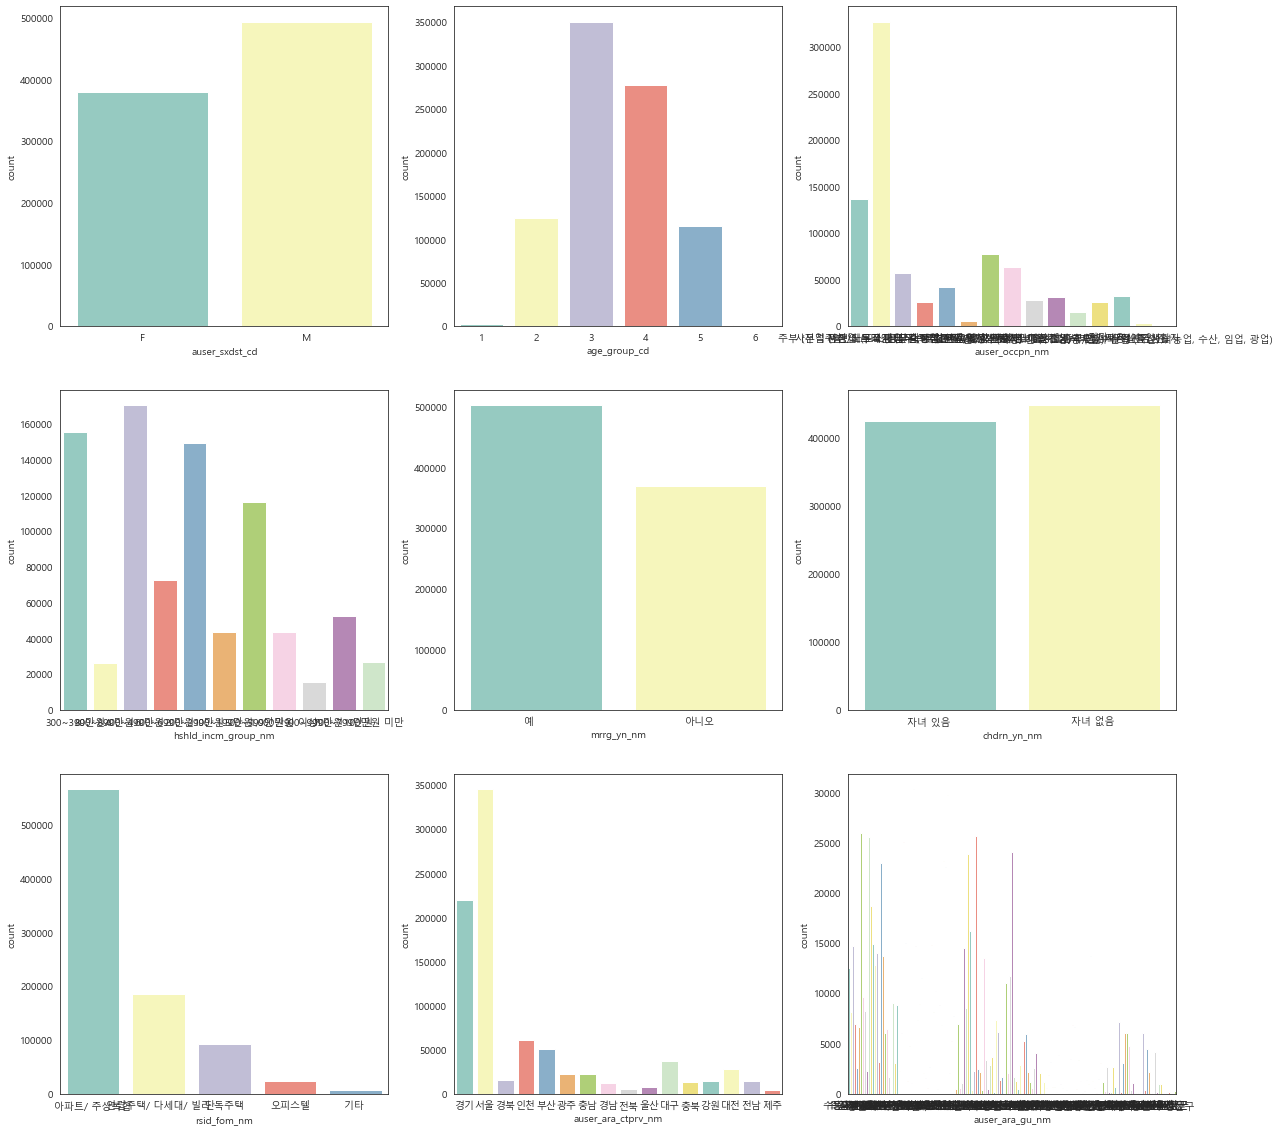

In [13]:
# 1. Visualization
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

p = 0
for a in ax:
    for i in a:
        sns.countplot(Demo.iloc[:,p], ax = i, palette='Set3')
        p += 1;

In [14]:
# 2. 각 변수 별로 value counts + value proportion

Demo_tmp = (Demo.melt().groupby(['variable', 'value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum')))).reset_index()
Demo_tmp

,variable,value,count,proportion
0,age_group_cd,1,2783,0.003190
1,age_group_cd,2,124247,0.142431
2,age_group_cd,3,350501,0.401798
3,age_group_cd,4,277816,0.318475
4,age_group_cd,5,115334,0.132214
5,age_group_cd,6,1650,0.001891
6,auser_ara_ctprv_nm,강원,14462,0.016579
7,auser_ara_ctprv_nm,경기,219953,0.252144
8,auser_ara_ctprv_nm,경남,11615,0.013315
9,auser_ara_ctprv_nm,경북,15024,0.017223


#### __Gender__

,variable,value,count,proportion
200,auser_sxdst_cd,F,378902,0.434356
201,auser_sxdst_cd,M,493429,0.565644


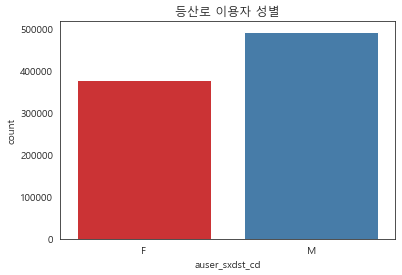

In [15]:
sns.countplot(Demo.auser_sxdst_cd, palette='Set1').set_title('등산로 이용자 성별');
Demo_tmp[Demo_tmp['variable'] == 'auser_sxdst_cd']

등산로 이용자는 여성보다는 남성이 많으며, 비율은 약 4:6으로 나타났다.

#### __Age__

,variable,value,count,proportion
0,age_group_cd,1,2783,0.003190
1,age_group_cd,2,124247,0.142431
2,age_group_cd,3,350501,0.401798
3,age_group_cd,4,277816,0.318475
4,age_group_cd,5,115334,0.132214
5,age_group_cd,6,1650,0.001891


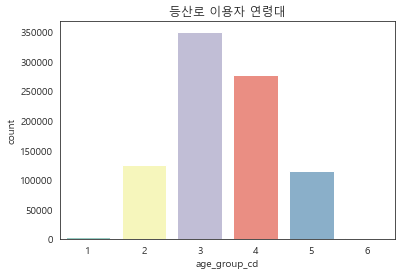

In [16]:
sns.countplot(Demo.age_group_cd, palette='Set3').set_title('등산로 이용자 연령대');
Demo_tmp[Demo_tmp['variable'] == 'age_group_cd']

등산로 이용자의 연령대는 30대가 가장 많으며, 30~40대 사이에 가장 많은 이용자가 분포되어 있다. 비율 상으로는 약 70% 가량이 해당 그룹에 분포해있음을 알 수 있다.

#### __Occupation__

,variable,value,count,proportion
185,auser_occpn_nm,"관리직 (사장, 간부, 고위공무원)",27855,0.031932
186,auser_occpn_nm,"교직 (교사, 유치원교사, 학원강사)",42175,0.048347
187,auser_occpn_nm,"기능직 (자동차정비, 운전기사, 안경사, 택시기사)",31467,0.036072
188,auser_occpn_nm,기타,25759,0.029529
189,auser_occpn_nm,"농/축/광/수산업 (축산, 낙농업, 수산, 임업, 광업)",240,0.000275
190,auser_occpn_nm,무직,32863,0.037673
191,auser_occpn_nm,"사무직 (일반사무직, 공무원, 직업군인)",326819,0.374650
192,auser_occpn_nm,"생산/노무직 (생산감독, 경비원, 공장근로자)",26162,0.029991
193,auser_occpn_nm,"서비스직 (요식업, 숙박업, 미용실종업원)",15344,0.017590
194,auser_occpn_nm,"자영업 (도소매업, 숙박업, 미용업)",57331,0.065722


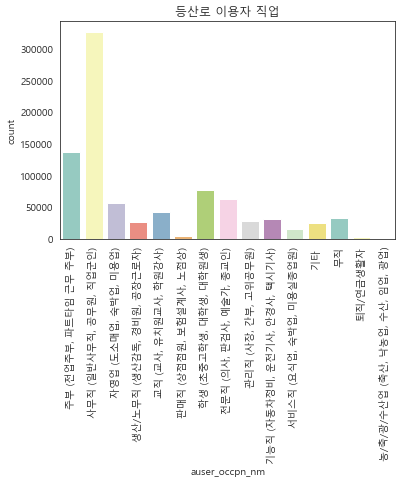

In [17]:
plt.xticks(rotation=90)
sns.countplot(Demo.auser_occpn_nm, palette='Set3').set_title('등산로 이용자 직업');
Demo_tmp[Demo_tmp['variable'] == 'auser_occpn_nm']

등산로 이용자의 직업은 사무직에 가장 많이 분포되어 있으며, 약 37% 비율을 보이고 있다. 두 번재로 높은 비율을 차지하는 직업군은 주부였으며, 약 16%의 비율을 차지한다.

#### __Income__

,variable,value,count,proportion
204,hshld_incm_group_nm,"1,000만원 이상",43420,0.049775
205,hshld_incm_group_nm,100~199만원,43392,0.049743
206,hshld_incm_group_nm,100만원 미만,26897,0.030833
207,hshld_incm_group_nm,200~299만원,149460,0.171334
208,hshld_incm_group_nm,300~399만원,155650,0.178430
209,hshld_incm_group_nm,400~499만원,170328,0.195256
210,hshld_incm_group_nm,500~599만원,116456,0.133500
211,hshld_incm_group_nm,600~699만원,72774,0.083425
212,hshld_incm_group_nm,700~799만원,52591,0.060288
213,hshld_incm_group_nm,800~899만원,26036,0.029846


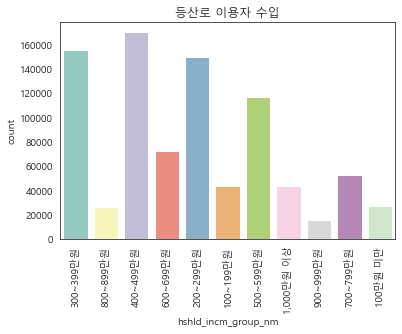

In [18]:
plt.xticks(rotation=90)
sns.countplot(Demo.hshld_incm_group_nm, palette='Set3').set_title('등산로 이용자 수입');
Demo_tmp[Demo_tmp['variable'] == 'hshld_incm_group_nm']

등산로 이용자의 가구 소득은 400-499만원이 가장 많았으며, 약 20%의 이용자가 해당 소득 구간에 포함되었다. 더불어 약 55%의 이용자가 200-499만원 사이의 소득 구간에 분포되어 있음을 알 수 있다.  

#### __Marital Status__

,variable,value,count,proportion
215,mrrg_yn_nm,아니오,369867,0.423998
216,mrrg_yn_nm,예,502464,0.576002


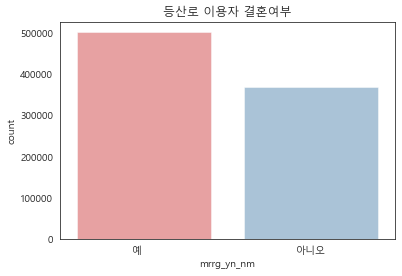

In [19]:
sns.countplot(Demo.mrrg_yn_nm, palette='Set1', alpha=0.46).set_title('등산로 이용자 결혼여부');
Demo_tmp[Demo_tmp['variable'] == 'mrrg_yn_nm']

등산로 이용자 중에서는 기혼자가 많지만, 그 비율은 약 6:4로 큰 비율 차이를 보이지는 않았다.

,variable,value,count,proportion
202,chdrn_yn_nm,자녀 없음,448053,0.513627
203,chdrn_yn_nm,자녀 있음,424278,0.486373


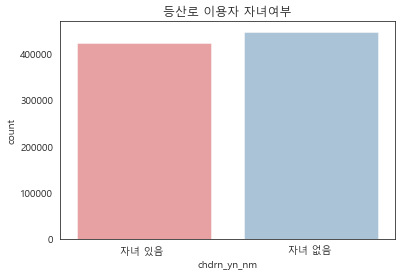

In [20]:
# Child Status
sns.countplot(Demo.chdrn_yn_nm, palette='Set1', alpha=0.46).set_title('등산로 이용자 자녀여부');
Demo_tmp[Demo_tmp['variable'] == 'chdrn_yn_nm']

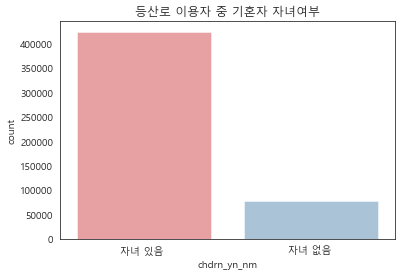

In [21]:
# 기혼자 중 자녀 유무 비율
Demo_married = Demo[Demo.mrrg_yn_nm == '예    ']
sns.countplot(Demo_married.chdrn_yn_nm, palette='Set1', alpha=0.46).set_title('등산로 이용자 중 기혼자 자녀여부');

AxesSubplot(0.260833,0.125;0.503333x0.755)


chdrn_yn_nm
자녀 없음      78186
자녀 있음     424278
Name: mrrg_yn_nm, dtype: int64

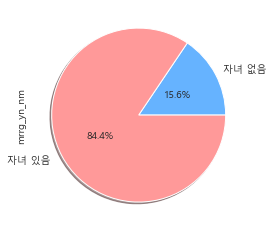

In [22]:
Demo_temp = Demo_married.groupby(['chdrn_yn_nm'])['mrrg_yn_nm'].count()
colors = ['#66b3ff', '#ff9999']
print(Demo_temp.plot.pie(autopct='%.1f%%', pctdistance=0.5, shadow=True, colors=colors));
Demo_temp

전체 등산로 이용자 중에서 자녀를 가진 사람들은 미세하게 더 적었지만, 기혼자 중에서는 자녀가 있는 사람들이 월등히 더 많은 것으로 나타났으며 그 비율은 약 84%이다.

#### __Residance Type__

,variable,value,count,proportion
217,rsid_fom_nm,기타,7166,0.008215
218,rsid_fom_nm,단독주택,91273,0.104631
219,rsid_fom_nm,아파트/ 주상복합,566351,0.649239
220,rsid_fom_nm,연립주택/ 다세대/ 빌라,184330,0.211307
221,rsid_fom_nm,오피스텔,23211,0.026608


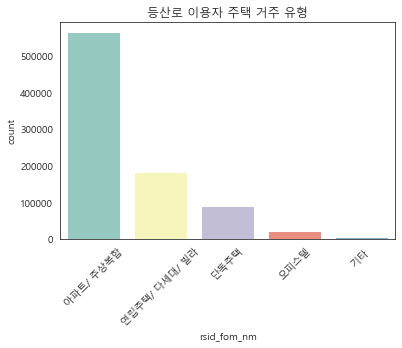

In [23]:
plt.xticks(rotation=45)
sns.countplot(Demo.rsid_fom_nm, palette='Set3').set_title('등산로 이용자 주택 거주 유형');
Demo_tmp[Demo_tmp['variable'] == 'rsid_fom_nm']

등산로 이용자들은 대부분 아파트/주상복합에서 거주하고 있는 것으로 나타났으며, 약 65%가 이에 분포해 있는 것을 알 수 있다.

#### __Residental Area__

,variable,value,count,proportion
6,auser_ara_ctprv_nm,강원,14462,0.016579
7,auser_ara_ctprv_nm,경기,219953,0.252144
8,auser_ara_ctprv_nm,경남,11615,0.013315
9,auser_ara_ctprv_nm,경북,15024,0.017223
10,auser_ara_ctprv_nm,광주,22031,0.025255
11,auser_ara_ctprv_nm,대구,36808,0.042195
12,auser_ara_ctprv_nm,대전,28051,0.032156
13,auser_ara_ctprv_nm,부산,50802,0.058237
14,auser_ara_ctprv_nm,서울,345490,0.396054
15,auser_ara_ctprv_nm,울산,7785,0.008924


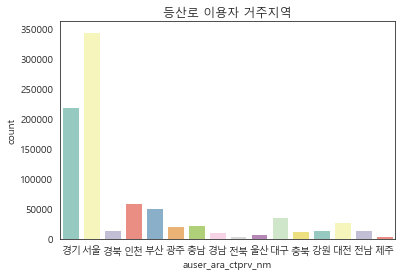

In [24]:
# Residental Area - City
sns.countplot(Demo.auser_ara_ctprv_nm, palette='Set3').set_title('등산로 이용자 거주지역');
Demo_tmp[Demo_tmp['variable'] == 'auser_ara_ctprv_nm']

등산로 이용자들은 대부분 서울 및 경기 지역에 거주하고 있는 것을 알 수 있으며, 그 비율은 약 65%이다.

,variable,value,count,proportion
22,auser_ara_gu_nm,가평군,1232,0.001412
23,auser_ara_gu_nm,강남구,14656,0.016801
24,auser_ara_gu_nm,강동구,8863,0.010160
25,auser_ara_gu_nm,강릉시,2132,0.002444
26,auser_ara_gu_nm,강북구,12776,0.014646
27,auser_ara_gu_nm,강서구,22965,0.026326
28,auser_ara_gu_nm,거제시,918,0.001052
29,auser_ara_gu_nm,거창군,2,0.000002
30,auser_ara_gu_nm,경산시,323,0.000370
31,auser_ara_gu_nm,경주시,2997,0.003436


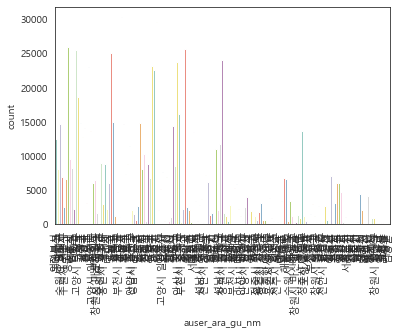

In [25]:
# Residental Area - Gun/Gu
plt.xticks(rotation=90)
sns.countplot(Demo.auser_ara_gu_nm, palette='Set3');
Demo_tmp[Demo_tmp['variable'] == 'auser_ara_gu_nm']

### __[이변수 탐색]__  
변수들 간의 관계를 종합적으로 탐색하기 위해서 유관도가 높다고 판단되는 변수들의 관계를 시각화 등을 통해 살펴보았다.

#### 1. 성별에 따른 연령 분포 확인

In [26]:
Demo.groupby(['auser_sxdst_cd', 'age_group_cd'])['auser_sxdst_cd'].count().to_frame()

auser_sxdst_cd
auser_sxdst_cd age_group_cd                
F              1                       2772
               2                      46635
               3                     170316
               4                     108036
               5                      51022
               6                        121
M              1                         11
               2                      77612
               3                     180185
               4                     169780
               5                      64312
               6                       1529

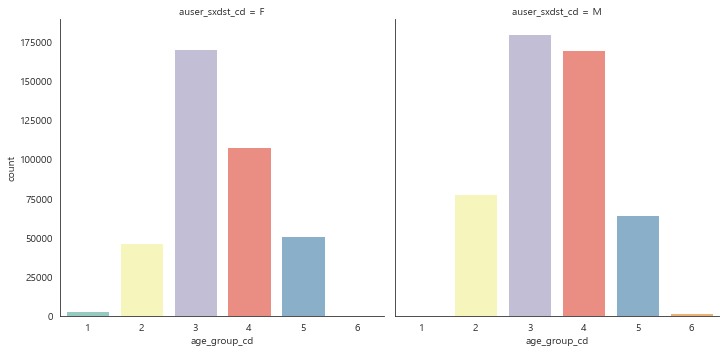

In [27]:
sns.catplot(x='age_group_cd', col = 'auser_sxdst_cd', kind='count', data=Demo, palette='Set3');

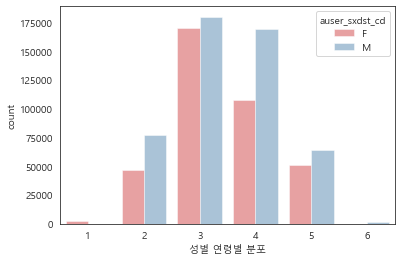

In [28]:
sns.countplot(x='age_group_cd', hue='auser_sxdst_cd', data=Demo, palette='Set1', alpha=0.46)
plt.xlabel('성별 연령별 분포');

#### 2. 지역에 따른 이용자 성별 비율

In [29]:
Demo.groupby(['auser_ara_ctprv_nm', 'auser_sxdst_cd'])['auser_ara_ctprv_nm'].count().to_frame()

auser_ara_ctprv_nm
auser_ara_ctprv_nm auser_sxdst_cd                    
강원                 F                             2569
                   M                            11893
경기                 F                            97861
                   M                           122092
경남                 F                             7668
                   M                             3947
경북                 F                            10628
                   M                             4396
광주                 F                             6785
                   M                            15246
대구                 F                            10329
                   M                            26479
대전                 F                            22886
                   M                             5165
부산                 F                            27913
                   M                            22889
서울                 F                           141573
                   M                           203917
울산                 F                             1555
                   M                             6230
인천                 F                            25904
                   M                            34451
전남                 F                             2260
                   M                            12215
전북                 F                             1882
                   M                             2952
제주                 F                              234
                   M                             4288
충남                 F                            12523
                   M                            10029
충북                 F                             6332
                   M                             7240

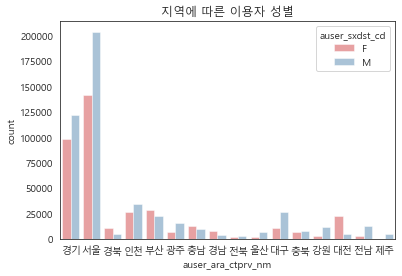

In [30]:
sns.countplot(x='auser_ara_ctprv_nm', hue='auser_sxdst_cd', data=Demo, palette='Set1', alpha=0.46).set_title('지역에 따른 이용자 성별');

#### 3. 성별에 따른 결혼 여부 분포 확인

In [31]:
Demo.groupby(['auser_sxdst_cd', 'mrrg_yn_nm'])['auser_sxdst_cd'].count()

auser_sxdst_cd  mrrg_yn_nm
F               아니오           142212
                예             236690
M               아니오           227655
                예             265774
Name: auser_sxdst_cd, dtype: int64

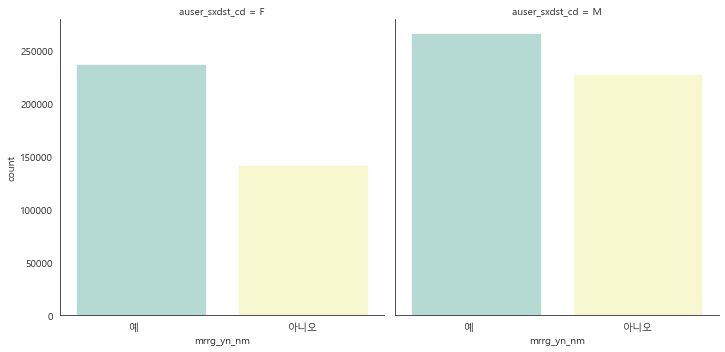

In [32]:
sns.catplot(x='mrrg_yn_nm', col='auser_sxdst_cd', kind='count', data=Demo, palette='Set3', alpha=0.7);

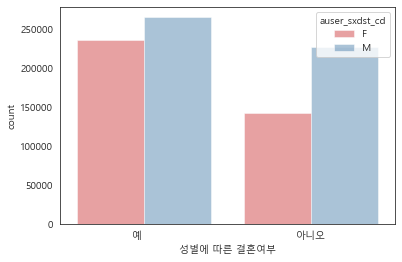

In [33]:
sns.countplot(x='mrrg_yn_nm', hue='auser_sxdst_cd', data=Demo, palette='Set1', alpha=0.46)
plt.xlabel('성별에 따른 결혼여부');

#### 4. 직업별 소득 분포 확인

In [34]:
Demo_tmp2 = Demo.groupby(['auser_occpn_nm', 'hshld_incm_group_nm'])['auser_occpn_nm'].count().unstack().reset_index().T.reset_index()
Demo_tmp2 = Demo_tmp2.rename(columns = Demo_tmp2.iloc[0]).drop(Demo_tmp2.index[0]).rename({'auser_occpn_nm':'가구 소득 구간'}, axis=1).fillna(0)

In [35]:
col = ['관리직 (사장, 간부, 고위공무원)', '교직 (교사, 유치원교사, 학원강사)', '기능직 (자동차정비, 운전기사, 안경사, 택시기사)', '기타 ', '농/축/광/수산업 (축산, 낙농업, 수산, 임업, 광업)', '무직', 
       '사무직 (일반사무직, 공무원, 직업군인)', '생산/노무직 (생산감독, 경비원, 공장근로자)', '서비스직 (요식업, 숙박업, 미용실종업원)', '자영업 (도소매업, 숙박업, 미용업)', 
       '전문직 (의사, 판검사, 예술가, 종교인)', '주부 (전업주부, 파트타임 근무 주부)', '퇴직/연금생활자', '판매직 (상점점원, 보험설계사, 노점상)', '학생 (초중고학생, 대학생, 대학원생)']
Demo_tmp2[col] = Demo_tmp2[col].astype(int)
Demo_tmp2

,가구 소득 구간,"관리직 (사장, 간부, 고위공무원)","교직 (교사, 유치원교사, 학원강사)","기능직 (자동차정비, 운전기사, 안경사, 택시기사)",기타,"농/축/광/수산업 (축산, 낙농업, 수산, 임업, 광업)",무직,"사무직 (일반사무직, 공무원, 직업군인)","생산/노무직 (생산감독, 경비원, 공장근로자)","서비스직 (요식업, 숙박업, 미용실종업원)","자영업 (도소매업, 숙박업, 미용업)","전문직 (의사, 판검사, 예술가, 종교인)","주부 (전업주부, 파트타임 근무 주부)",퇴직/연금생활자,"판매직 (상점점원, 보험설계사, 노점상)","학생 (초중고학생, 대학생, 대학원생)"
1,"1,000만원 이상",303,305,0,13,0,0,27542,7046,203,0,5304,2540,0,0,164
2,100~199만원,0,3073,86,103,0,7973,14293,324,517,2451,6210,1397,322,10,6633
3,100만원 미만,0,4943,0,1041,0,6480,294,41,1,6864,0,3619,435,97,3082
4,200~299만원,103,7564,710,15828,0,9763,37787,4913,1782,12273,10828,18246,2580,208,26875
5,300~399만원,6160,4801,13377,655,240,4960,47641,4661,5071,14700,3205,35899,27,3023,11230
6,400~499만원,6089,8034,3193,359,0,2513,70152,3075,3593,8635,8954,46638,274,552,8267
7,500~599만원,11925,6790,1284,130,0,809,51876,4628,644,1922,14551,8065,0,594,13238
8,600~699만원,734,5531,9871,3,0,117,29243,355,2882,9253,6944,6904,0,0,937
9,700~799만원,407,862,2915,7580,0,234,28151,856,634,1131,4334,4174,0,466,847
10,800~899만원,1677,134,31,47,0,0,15355,0,17,101,2477,1365,0,0,4832


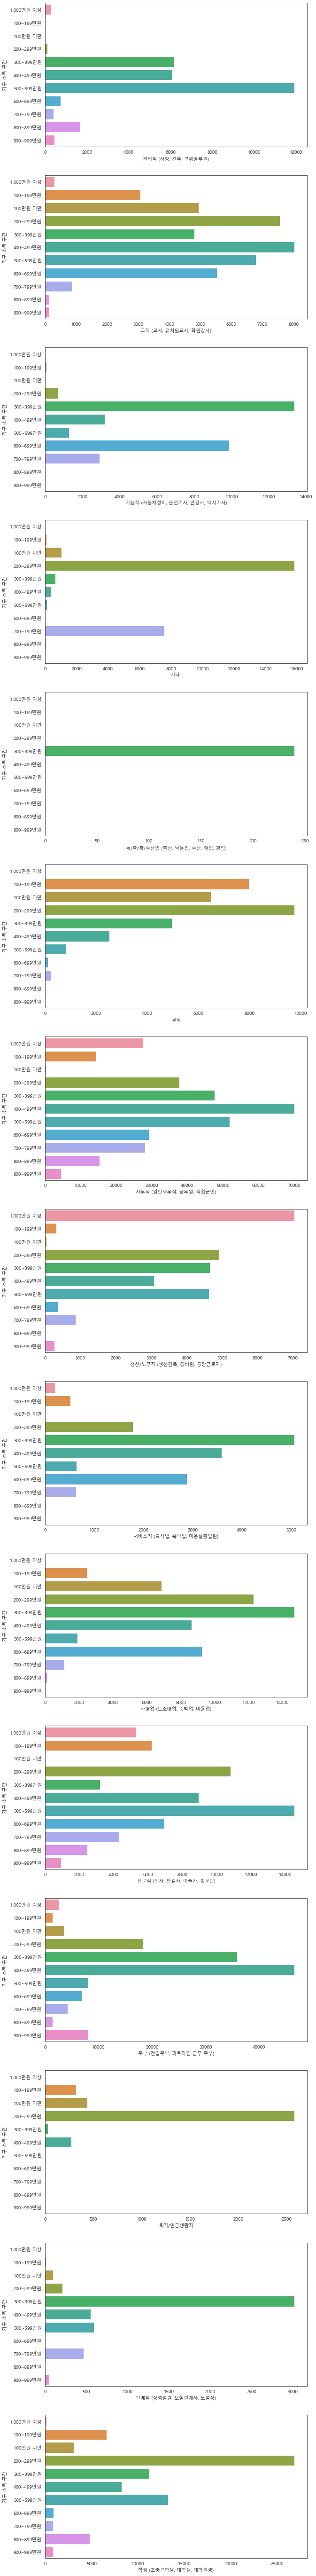

In [36]:
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(10,100))

for i, a in zip(col, ax):
    sns.barplot(x = Demo_tmp2[i], y = '가구 소득 구간', ax=a, data=Demo_tmp2)

#### 5. 등산로 이용자 거주지역 별 주택유형 분포

In [37]:
Demo_loc = Demo[['auser_ara_ctprv_nm', 'rsid_fom_nm']]
Demo_loc

,auser_ara_ctprv_nm,rsid_fom_nm
0,경기,아파트/ 주상복합
1,경기,아파트/ 주상복합
2,경기,아파트/ 주상복합
3,경기,아파트/ 주상복합
4,경기,아파트/ 주상복합
5,경기,아파트/ 주상복합
6,경기,아파트/ 주상복합
7,경기,아파트/ 주상복합
8,경기,아파트/ 주상복합
9,경기,아파트/ 주상복합


In [38]:
Demo_loc = Demo.groupby(['auser_ara_ctprv_nm', 'rsid_fom_nm'])['auser_ara_ctprv_nm'].count().to_frame().unstack().reset_index().T.reset_index()
Demo_loc = Demo_loc.rename(columns = Demo_loc.iloc[0]).drop(Demo_loc.index[0]).drop('auser_ara_ctprv_nm', axis=1).fillna(0)
Demo_loc.columns = ['주택유형', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
cols = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
Demo_loc[cols] = Demo_loc[cols].astype(int)
Demo_loc

,주택유형,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
1,기타,0,3717,0,0,0,0,0,0,506,0,8,0,60,0,0,2875
2,단독주택,1789,7835,2986,1793,6211,4681,1976,13993,29621,646,17690,999,350,36,644,23
3,아파트/ 주상복합,12272,167652,7724,8882,15288,22096,25075,24288,197057,6754,28901,13474,4253,4364,19938,8333
4,연립주택/ 다세대/ 빌라,401,26885,898,4349,532,10031,978,12521,109931,385,12928,2,171,7,1970,2341
5,오피스텔,0,13864,7,0,0,0,22,0,8375,0,828,0,0,115,0,0


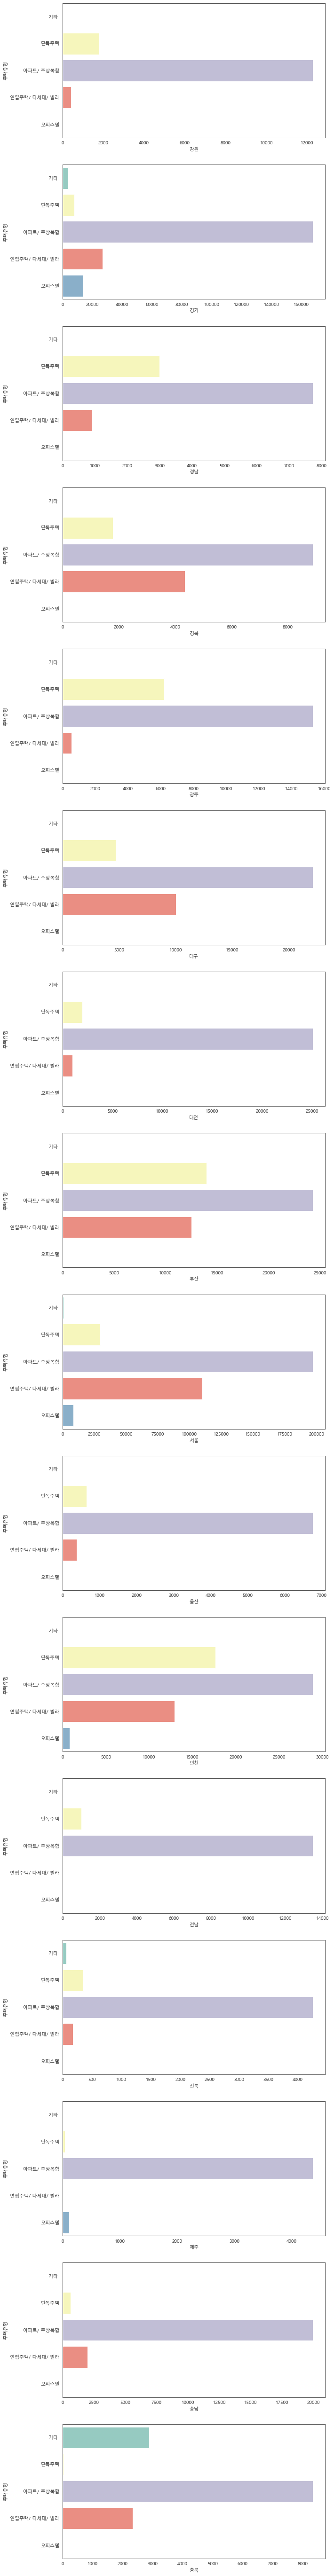

In [39]:
fig, ax = plt.subplots(nrows=16, ncols=1, figsize=(10,100))

for i, a in zip(cols, ax):
    sns.barplot(x = Demo_loc[i], y = '주택유형', ax=a, data=Demo_loc, palette='Set3')

### __[등산로 이용자 Psychographic Segmentation]__

In [40]:
Psy.value_counts().to_frame()

,main_ntrs_cd
스포츠,416029
사회,232211
TV연예,157643
경제,35709
정치,25683
생활,2556
세계,1767
IT,733


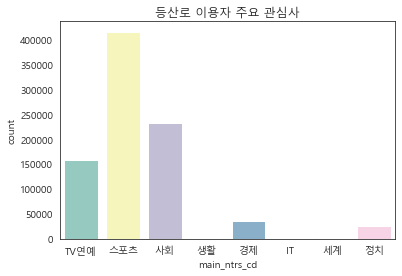

In [41]:
sns.countplot(Psy, palette='Set3').set_title('등산로 이용자 주요 관심사');

등산로 이용자들의 주 관심사로는 스포츠가 가장 높았으며, 그 다음으로는 사회 및 TV연예 분야에 대한 관심도가 높게 나타났다.

<br/>

## __Conclusion__

### __1. Demographic Segmentation__  

등산로 이용자를 인구통계학적으로 세분화한 결과는 다음과 같다.
- 등산로 이용자의 경우 성별 구성은 남성이 미세하게 높았으나, 비율의 차이가 거의 없는 것으로 보아 여성과 남성 구분 없이 모두 등산로 이용을 즐기는 것으로 판단된다. 다만 연령대는 30-40대에 많이 분포되어 있었으며, 60% 가량이 기혼자이고 이 중 약 84%가 자녀를 가진 것으로 보아 가족 등산객을 대상으로 한 프로그램을 기획할 여지가 있는 것으로 짐작된다.
- 등산로 이용자의 직업군은 공무원, 직업군인 등의 사무직과 주부의 비율이 높은 것으로 나타나 30-40대 사무직과 주부를 대상으로 한 프로그램 마련이 필요해 보인다. 이때 사무직의 소득구간은 대부분 300-599만원에 분포되어 있었으며, 주부의 소득구간은 300-499만원에 분포되어 있는 것을 고려하여 유료 프로그램 마련 시 가격대를 참고하여 결정할 수 있다.
- 등산로 이용자는 대부분 서울 및 경기 지역에 거주하였으며, 그 비율은 약 65%나 되었다. 이때 인천 지역까지 포함한다면 등산로 이용자의 약 72% 가량이 수도권 거주자임을 알 수 있다. 더불어 지역별 주택 거주 유형은 대부분 아파트가 가장 높았지만, 부산과 인천의 경우 단독주택에 거주하는 인구 비율도 높은 것으로 나타났다. 이러한 결과는 등산로 신규 구축 및 프로모션 등의 참고자료가 될 수 있을 것이다.  


### __2. Psychographic Segemntation__

추가적으로 등산로 이용자를 관심사를 바탕으로 세분화한 결과는 다음과 같다.
- 등산로 이용자의 관심사를 조사한 결과, 주 관심사는 스포츠가 가장 높았으며, 그 다음으로는 사회 및 TV연예 분야에 대한 관심도가 높게 나타났다. 이를 바탕으로 등산로 프로그램을 새롭게 기획할 시, 그 프로모션 전략을 구성함에 있어 이용자들의 관심사를 고려하는 참고자료로서 이용할 수 있을 것으로 기대된다.